<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/scikit_learn%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9B%8C%ED%81%AC%ED%94%8C%EB%A1%9C%EC%9A%B0_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn
- https://scikit-learn.org/stable/
- 다양한 머신러닝 관련한 기술들을 통일되고 쉬운 인터페이스로 사용할수 있게 해주는 라이브러리
- 머신러닝 관련 알고리즘과 개발을 위한 기능 제공
- 주피터 노트북 환경에서 설치 방법
```python
!pip install scikit-learn
```
- 일반적인 사이킷런 api import 방법
```python
from sklearn.<모듈명> import <함수명 or 클래스명>
```

- 타이타닉 생존자 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 학습세트: https://drive.google.com/file/d/17DUdpAGVIPJ5_Cghku38YG5ugN6-SiNX/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/1ZhrzzI81mN_rFWXw68eO2a2NQ8vg8IlZ/view?usp=sharing
    - 평가세트 정답: https://drive.google.com/file/d/1kBJwGeAI1y81-gL8AAVVs4ealPHTcNNS/view?usp=sharing

- 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/머신러닝/data/"
DATA_PATH

'/content/drive/MyDrive/머신러닝/data/'

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
test_target = pd.read_csv(f"{DATA_PATH}titanic_test_target.csv") # 테스트데이터 정답값
train.shape , test.shape , test_target.shape

((916, 12), (393, 11), (393, 2))

- 타이타닉 데이터셋 컬럼명 정보
    - passengerid: 승객 id
    - survived: 생존 여부(0:사망, 1:생존)
    - pclass: 객실등급(1, 2, 3)
    - name: 이름
    - gender: 성별 (male,female)
    - age: 나이
    - sibsp: 동반한 형제자매, 배우자 수
    - parch: 동반한 부모, 자녀 수
    - ticket: 티켓번호
    - fare: 요금
    - cabin: 객실 번호
    - embarked: 탑승 항구(C,Q,S)

In [ ]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


In [ ]:
cols_cat = ["pclass","name","gender","ticket","cabin","embarked"] # 범주형 컬럼
cols_num = ["age","sibsp","parch","fare"] # 수치형 컬럼

# 데이터 분석(Data analysis)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        210 non-null    object 
 11  embarked     916 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


## 타겟값 확인
- 생존 비율 확인하기

In [ ]:
train["survived"].mean()

0.3777292576419214

## 수치형 변수 분석

In [ ]:
cols_num

['age', 'sibsp', 'parch', 'fare']

- 수치형 변수에 대한 통계량 확인하기

In [ ]:
train[cols_num].describe()

,age,sibsp,parch,fare
count,736.000000,916.000000,916.000000,916.000000
mean,29.904891,0.494541,0.375546,34.428848
std,14.255770,1.040687,0.877660,54.607103
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.500000
75%,38.000000,1.000000,0.000000,31.500000
max,80.000000,8.000000,9.000000,512.329200


- 왜도(Skewness) 확인하기
    - 데이터의 분포의 비대칭도를 나타내는 통계량
    - 분포가 오른쪽으로 치우쳐져있고, 왼쪽으로 긴꼬리를 가진경우 왜도는 음수
    - 분포가 왼쪽으로 치우쳐져있고 오른쪽으로 긴꼬리를 가진경우 왜도는 양수
    - 정규 분포같이 좌우 대칭인 경우 왜도는 0에 가까워진다.

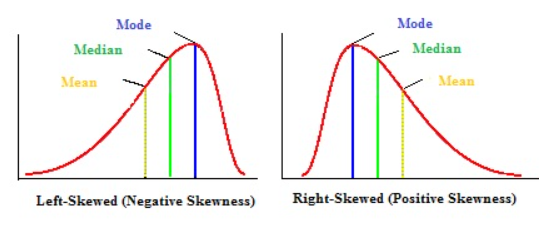

In [ ]:
for col in cols_num:
    print(f"{col}: {train[col].skew()}")

age: 0.45286967436496056
sibsp: 4.028972136352583
parch: 4.062338401867058
fare: 4.516880682244371


- 상관계수 확인하기
    - 두개의 수치형 변수의 변화가 연관되는 정도
    - +1과 -1사이의 값을 가짐
    - +1에 가까울수록 양의 상관관계
    - -1에 가까울수록 음의 상관관계
    - 0에 가까울수록 상관관계 없음

In [ ]:
cols = cols_num + ["survived"]
train[cols].corr()

,age,sibsp,parch,fare,survived
age,1.000000,-0.227772,-0.163459,0.182191,-0.032927
sibsp,-0.227772,1.000000,0.343265,0.119521,0.004089
parch,-0.163459,0.343265,1.000000,0.165641,0.095138
fare,0.182191,0.119521,0.165641,1.000000,0.237830
survived,-0.032927,0.004089,0.095138,0.237830,1.000000


## 범주형 변수 분석

In [ ]:
cols_cat

['pclass', 'name', 'gender', 'ticket', 'cabin', 'embarked']

- 고유값 개수 확인하기

In [ ]:
train[cols_cat].nunique()

,0
pclass,3
name,914
gender,2
ticket,692
cabin,145
embarked,3


- 범주형 변수의 범주별 개수 보기

In [ ]:
for col in cols_cat:
    print("#"*50)
    print(train[col].value_counts())

##################################################
pclass
3    491
1    230
2    195
Name: count, dtype: int64
##################################################
name
Kelly, Mr. James                                              2
Connolly, Miss. Kate                                          2
Artagaveytia, Mr. Ramon                                       1
Vestrom, Miss. Hulda Amanda Adolfina                          1
Pears, Mrs. Thomas (Edith Wearne)                             1
                                                             ..
de Pelsmaeker, Mr. Alfons                                     1
Henry, Miss. Delia                                            1
Hale, Mr. Reginald                                            1
Crosby, Mrs. Edward Gifford (Catherine Elizabeth Halstead)    1
Nicholls, Mr. Joseph Charles                                  1
Name: count, Length: 914, dtype: int64
##################################################
gender
male      580
female    336
Name

- 범주형 변수 관계(pclass 변수)

In [ ]:
pd.crosstab(train["pclass"], train["survived"], normalize="index")

survived,0,1
pclass,,
1,0.413043,0.586957
2,0.569231,0.430769
3,0.741344,0.258656


- 범주형 변수 관계(gender 변수)

In [ ]:
pd.crosstab(train["gender"], train["survived"], normalize="index")

survived,0,1
gender,,
female,0.181548,0.818452
male,0.877586,0.122414


- 범주형 변수 관계(embarked 변수)

In [ ]:
pd.crosstab(train["embarked"], train["survived"], normalize="index")

survived,0,1
embarked,,
C,0.537634,0.462366
Q,0.607143,0.392857
S,0.648607,0.351393


## 결측치 확인하기

In [ ]:
train.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
gender,0
age,180
sibsp,0
parch,0
ticket,0
fare,0


# 특성 공학(Feature Engineering)
- Feature Engineering 과정에서 평가를 위한 예측을 해야하기 때문에 테스트 세트에 대해서도 동일한 작업을 진행해줘야 한다.


## Feature Extraction

- 특성으로 사용할 변수 추가하기

In [ ]:
cols = cols_num + ['pclass','gender','embarked']
train_ft = train[cols].copy()
test_ft = test[cols].copy() # 테스트 데이터
train_ft.shape, test_ft.shape

((916, 7), (393, 7))

## Data Cleaning
- 결측치 확인하기

In [ ]:
train_ft.isnull().sum()

,0
age,180
sibsp,0
parch,0
fare,0
pclass,0
gender,0
embarked,0


In [ ]:
test_ft.isnull().sum()

,0
age,83
sibsp,0
parch,0
fare,1
pclass,0
gender,0
embarked,2


- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [ ]:
age_mean = train_ft["age"].mean() # 평균
fare_median = train_ft["fare"].median() # 중앙값
embarked_mode = train_ft["embarked"].mode()[0] # 최빈값
age_mean , fare_median , embarked_mode

(29.904891304347824, 14.5, 'S')

- 학습데이터 결측치 처리

In [ ]:
train_ft["age"] = train_ft["age"].fillna(age_mean)

- 테스트 데이터 결측치 처리

In [ ]:
test_ft["age"] = test_ft["age"].fillna(age_mean)
test_ft["fare"] = test_ft["fare"].fillna(fare_median)
test_ft["embarked"] = test_ft["embarked"].fillna(embarked_mode)

In [ ]:
train_ft.isnull().sum().sum() , test_ft.isnull().sum().sum()

(0, 0)

## Feature Encoding

- 범주형 변수 원핫인코딩하여 특성으로 추가하기
    - 원핫인코딩(One-Hot Encoding)이란?
        - 범주를 많은 0과 하나의 1값으로 범주를 수치화하는 인코딩 기법

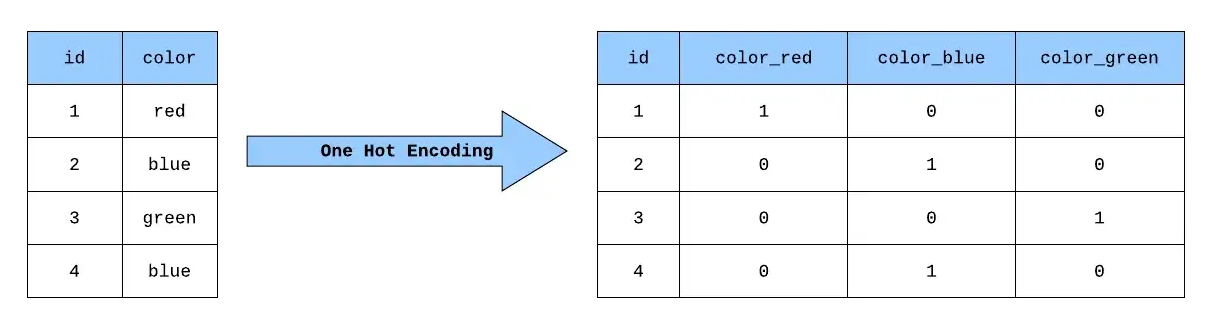

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cols = ['gender','embarked']
enc = OneHotEncoder(handle_unknown = 'ignore') # 모르는 범주가 있을 경우 무시
enc.fit_transform(train_ft[cols]).toarray()

array([[0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [ ]:
enc.get_feature_names_out() # 컬럼명

array(['gender_female', 'gender_male', 'embarked_C', 'embarked_Q',
       'embarked_S'], dtype=object)

In [ ]:
# 데이터 프레임형태로 변환
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols]).toarray(),
    columns =  enc.get_feature_names_out()
)
tmp

,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
911,0.0,1.0,1.0,0.0,0.0
912,0.0,1.0,0.0,1.0,0.0
913,0.0,1.0,0.0,0.0,1.0
914,0.0,1.0,0.0,0.0,1.0


In [ ]:
# 인코딩된 컬럼 추가하기
train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 삭제
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,71.0,0,0,49.5042,1,0.0,1.0,1.0,0.0,0.0
1,34.0,0,0,8.0500,3,0.0,1.0,0.0,0.0,1.0
2,29.0,3,1,22.0250,3,0.0,1.0,0.0,0.0,1.0
3,18.0,1,1,13.0000,2,1.0,0.0,0.0,0.0,1.0
4,48.0,0,0,26.5500,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
# 테스트 데이터에도 동일한 특성을 추가한다. 단, 절대 fit 을 하면 안된다.
# fit 을 할 경우 Data Leakage에 해당한다.
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,62.000000,0,0,26.5500,1,0.0,1.0,0.0,0.0,1.0
1,28.000000,0,0,47.1000,1,0.0,1.0,0.0,0.0,1.0
2,24.000000,0,0,9.5000,3,0.0,1.0,0.0,0.0,1.0
3,29.904891,0,0,7.7333,3,1.0,0.0,0.0,1.0,0.0
4,18.500000,0,0,7.2833,3,1.0,0.0,0.0,1.0,0.0


- Data Leakage
    - 정보의 누설을 의미
    - 예측할 때 사용할 수 없는 정보를 학습에 사용하는 경우

## Feature Scaling
- Min-Max Scaling
    - 데이터 수치의 범위를 바꿔주는 정규화 스케일링 기법입니다.
    - 데이터 수치의 범위를 0 ~ 1 사이로 바꿔준다.
$$
\frac{x-Min(X)}{Max(X)-Min(X)}
$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(train_ft)

array([[0.88726043, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42377552, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36114243, 0.375     , 0.11111111, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44882876, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.473882  , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.23587624, 0.125     , 0.11111111, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.887260,0.000,0.000000,0.096626,0.0,0.0,1.0,1.0,0.0,0.0
1,0.423776,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0
2,0.361142,0.375,0.111111,0.042990,1.0,0.0,1.0,0.0,0.0,1.0
3,0.223350,0.125,0.111111,0.025374,0.5,1.0,0.0,0.0,0.0,1.0
4,0.599148,0.000,0.000000,0.051822,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# 테스트 데이터에 대하여 fit 을 할 경우 Data Leakage에 해당한다.
test_ft[test_ft.columns] = scaler.transform(test_ft) # 테스트 데이터
test_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.774521,0.0,0.0,0.051822,0.0,0.0,1.0,0.0,0.0,1.0
1,0.348616,0.0,0.0,0.091933,0.0,0.0,1.0,0.0,0.0,1.0
2,0.298509,0.0,0.0,0.018543,1.0,0.0,1.0,0.0,0.0,1.0
3,0.372478,0.0,0.0,0.015094,1.0,1.0,0.0,0.0,1.0,0.0
4,0.229613,0.0,0.0,0.014216,1.0,1.0,0.0,0.0,1.0,0.0


- 정답 데이터

In [ ]:
target = train["survived"]
target

,survived
0,0
1,0
2,0
3,1
4,1
...,...
911,1
912,0
913,0
914,0


# 데이터 분리(Data Split)
- 학습데이터와 검증데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_ft, target, test_size=0.2, random_state=42)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((732, 10), (184, 10), (732,), (184,))

# 모델 학습(Train Model)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred = model.predict(x_valid)
pred[:5]

array([0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,pred)

0.8152173913043478

# 모델 평가(Model Evaluation)

- 전체 train 데이터를 다시 학습한다.

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_ft,train["survived"])

DecisionTreeClassifier(random_state=42)

- 테스트 데이터 예측

In [ ]:
pred = model.predict(test_ft)
pred[:5]

array([0, 1, 0, 1, 0])

- 테스트 세트 평가

In [ ]:
accuracy_score(test_target["survived"],pred)

0.821882951653944

- 학습 완료된 모델 저장하기

In [ ]:
import joblib
joblib.dump(model,"dt_model.pkl")

['dt_model.pkl']

- 모델 불러오기

In [ ]:
model = joblib.load("dt_model.pkl")
pred = model.predict(test_ft)
accuracy_score(test_target["survived"],pred)

0.821882951653944